# Taller 4

1. [**12.1 Principios de las series de Fourier y la Transformada de Fourier**](#primero)
    2. [** Fast Fourier Transform: FFT, IFFT, FFTSHIFT, IFFTSHIFT**](#segundo)
    3. [**FFT versus diferencias finitas**](#tercero)
2. [**12.2 Aplicaciones de la FFT: Detección de radares y filtros **](#cuarto)
3. [**12.3 Aplicaciones de la FFT: radares y promedios**](#quinto)
4. [**Ejemplo propio**](#sexto)

In [1]:
%pylab inline
import matplotlib as mp
from scipy.fftpack import fft
import numpy as np
import math as m
import matplotlib.pyplot as plt
import wave
import sys
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


## 12.1 Principios de las series de Fourier y la Transformada de Fourier<a name="primero"></a>

### A. Fast Fourier Transform: FFT, IFFT, FFTSHIFT, IFFTSHIFT<a name="segundo"></a>

Para observar una aplicación sencilla de la transformada rápida de Fourier, se analiza la siguiente ecuación:

$f(x)=exp(-\alpha x^2)$

Para la cual se tiene su transformada analítica:

$\hat{f(k)}=\frac{1}{\sqrt{2\alpha}} \hspace{0.1cm} exp(-k^2/2\alpha)$

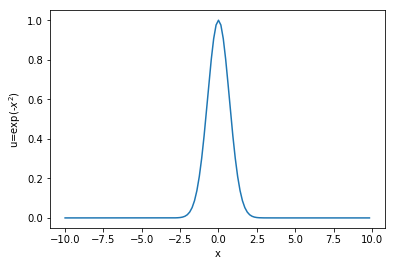

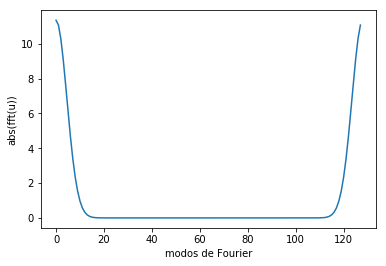

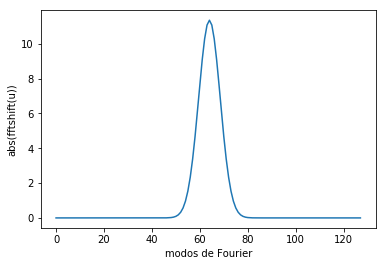

/Users/nvalencia/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


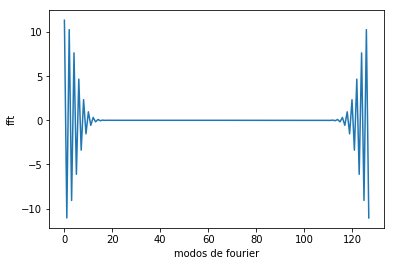

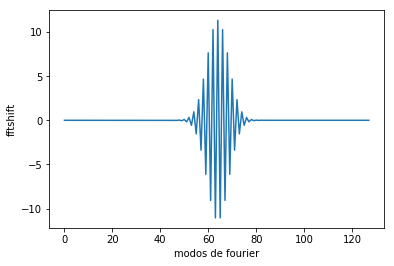

In [2]:
L=20 #definición de dominio computacional [-L/2,L/2]
n=128 #definición de modos de Fourier 2^n
x2=linspace(-L/2,L/2,n+1) #dominio a discretizar
x=x2[0:n] #en la periodicidad se consideran sólo los primeros n puntos

u1=exp(-x*x) #función gaussiana
ut1=fft(u1) # FFT de la función
utshift1=fftshift(ut1) #organiza la transformada en el orden matemático real

plt.plot(x,u1) #graficación de la función gaussiana
plt.xlabel('x')
plt.ylabel('u=exp(-$x^2$)')
plt.show()

plt.plot(abs(ut1)) #graficación de la transformada
plt.xlabel('modos de Fourier') 
plt.ylabel('abs(fft(u))')
plt.show()

plt.plot(abs(utshift1)) #graficación de la transformada organizada
plt.xlabel('modos de Fourier')
plt.ylabel('abs(fftshift(u))')
plt.show()

plot(ut1)
plt.xlabel('modos de fourier')
plt.ylabel('fft')
plt.show()

plt.plot(utshift1)
plt.xlabel('modos de fourier')
plt.ylabel('fftshift')
plt.show()

Se observa, en la segunda gráfica, como el pulso se cambia de posición. Por medio de la función $ffshift$ es posible redgresar a la forma original de la transformada. Este Proceso es normal del método $fft$. Sin embargo, para realizar la transformación inversa, se requiere que la transformada se encuentre en su estado original, es decir, con su contraparte de 'espejo'. La operación anterior se realiza mediante la función $ifft$. La primera gráfiica presenta el comportamiento de la función gaussiana real, mientras que las últimas dos muestran el comportamiento real tanto de la transformada real, como se su correcto ordenamiento.

### B. FFT versus diferencias finitas<a name="tercero"></a>

En comparación al método de diferencias finitas, en donde la aproximación de la derivada se realiza de forma local, debido a que cada ecuación sólo es relacionada con sus vecinos, el método de $fft$ se lleva a cabo de forma global al aproximar una derivada, ya que su respectiva expansión de senos y cosenos se expande por todo el dominio. Para este caso, se compara el método de derivación por medio de FFT con los resultados que se obtienen al aproximar la derivada mediante diferencias finitas. Esta aproximación se realiza usando operadores centrados de cuarto orden, con la excepción de que, para el primer punto, se usa una aproximación hacia adelante de segundo orden.

En este caso, se utiliza la siguiente función para el análisis:

$u(x)=sech(x)$

Con sus primeras dos derivadas siendo:

$\frac{du}{dx}=-sech(x)tanh(x)$

$\frac{d^2u}{dx^2}=sech(x)-2sech^3(x)$

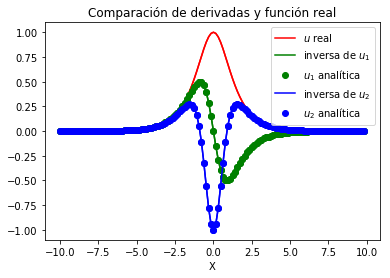

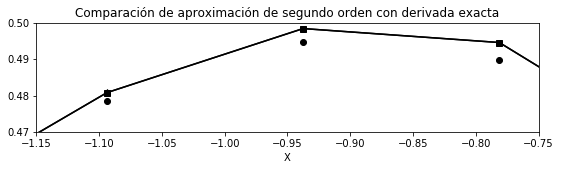

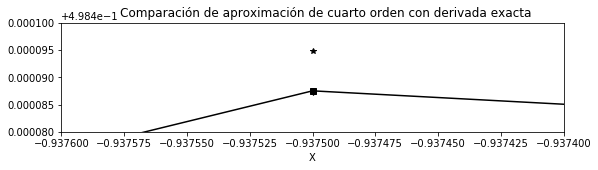

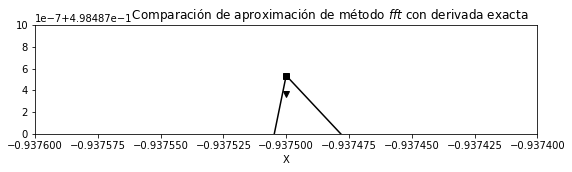

In [3]:
dx=x[1]-x[0] #espaciamiento usado en la discretización
u2=1/np.cosh(x) #función a derivar
ut2=fft(u2) #transformada de la función
k=2*pi/L*np.concatenate((np.arange(0,n/2),np.arange(-n/2,0))) #reescalamiento al dominio 2pi

#cálculo de las derivadas
utprime=1j*k*ut2
utprime2=-k*k*ut2
ureal1=np.real(ifft(utprime))
ureal2=np.real(ifft(utprime2))
analitica1=-1/np.cosh(x)*np.tanh(x) #primera derivada analítica
analitica2=1/np.cosh(x)-2*(1/cosh(x))**3 #segunda derivada analitica

#Cálculo en diferencias finitas de la primera derivada
#Hacia adelante de segundo orden
ux=zeros(n)
ux[0]=(-3*u2[0]+4*u2[1]-u2[2])/(2*dx)
for i in np.arange(1,n-1):
    ux[i]=(u2[i+1]-u2[i-1])/(2*dx)
ux[-1]=(3*u2[-1]-4*u2[-2]+u2[-3])/(2*dx)

#Centrada de cuarto orden
ux2=zeros(n)
ux2[0]=(-3*u2[0]+4*u2[1]-u2[2])/(2*dx) #Se usa en las fronteras hacia adelante de segundo orden
ux2[1]=(-3*u2[1]+4*u2[2]-u2[3])/(2*dx)
for i in np.arange(2,n-2):
    ux2[i]=(-u2[i+2]+8*u2[i+1]-8*u2[i-1]+u2[i-2])/(12*dx)
ux2[-2]=(3*u2[-2]-4*u2[-3]+u2[-4])/(2*dx) #Se usa en las fronteras hacia adelante de segundo orden
ux2[-1]=(3*u2[-1]-4*u2[-2]+u2[-3])/(2*dx)

plot(x,u2,'r',x,ureal1,'g',x,analitica1,'go',x,ureal2,'b',x,analitica2,'bo')
plot(x,u2,'r',label='$u$ real')
plot(x,ureal1,'g',label='inversa de $u_1$')
plot(x,analitica1,'go',label='$u_1$ analítica')
plot(x,ureal2,'b',label='inversa de $u_2$')
plot(x,analitica2,'bo',label='$u_2$ analítica')
xlabel('X')
legend(loc='best')
title('Comparación de derivadas y función real')
show()

fig1 = plt.figure(figsize=(9, 2))
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(x,analitica1,'ks-',x,ureal1,'k',x,ux,'ko',x,ux2,'k*')
axis([-1.15, -0.75, 0.47, 0.5])
xlabel('X')
title('Comparación de aproximación de segundo orden con derivada exacta')
plt.show()

fig2 = plt.figure(figsize=(9, 2))
ax2 = fig2.add_subplot(1,1,1)
ax2.plot(x,analitica1,'ks-',x,ureal1,'kv',x,ux,'ko',x,ux2,'k*') 
axis([-0.9376, -0.9374, 0.49848, 0.49850])
title('       Comparación de aproximación de cuarto orden con derivada exacta')
xlabel('X')
plt.show()

fig3 = plt.figure(figsize=(9, 2))
ax3 = fig3.add_subplot(1,1,1)
ax3.plot(x,analitica1,'ks-',x,ureal1,'kv',x,ux,'ko',x,ux2,'k*')
xlabel('X')
title('                       Comparación de aproximación de método $fft$ con derivada exacta')
axis([-0.9376, -0.9374, 0.498487, 0.498488])
plt.show()

Las gráficas anteriores comparan cada uno de los métodos usados para calcular la derivada, con el valor analítico de la misma. Como se observa en la primera, el cálculo por medio de FFT y el valor analítico es casi el mismo. De la segunda gráfica, se tiene que, la diferencia entre el método de diferencias finitas de segundo orden y el valor real se encuentra en un orden de $O(10^{-2})$. En la tercera gráfica se aprecia que, al aumentar la precisión del operador a uno de cuarto orden, la diferencia se reduce al orden de $O(10^{-5})$. Finalmente, de la última gráfica se deduce que el método de menor error es el FFT, en donde el error es de $O(10^{-6})$ con respecto a los valores calculados analíticamente.

## 12.2 Aplicaciones del FFT: Detección de radares y filtros<a name="cuarto"></a>

Para analizar las aplicaciones de filtrado, se analiza una función ideal de secante hiperbólica. Esta es la señal final a la que se desea llegar una vez se realice el proceso de filtración y remoción de ruido.

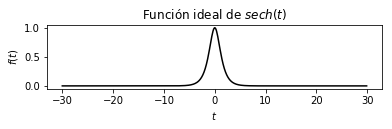

In [4]:
L2=30 #tiempo a discretizar
n2=512 #modos de Fourier 2^9
t2=linspace(-L2,L2,n2+1) 
t=t2[0:n2] #Discrerización del tiempo
k2=(2*pi/(2*L2))*np.concatenate((np.arange(0,n2/2),np.arange(-n2/2,0))) #reescalamiento al dominio 2pi
u3=1/cosh(t) #señal ideal en dominio temporal
figure(1)
subplot(311)
plot(t,u3,'k')
xlabel('$t$')
ylabel('$f(t)$')
title('Función ideal de $sech(t)$')
show()

Este tipo de funciones, como las observadas en la gráfica superior, no son comunes. En realidad, traen consigo lo que se conoce como ruido blanco, el cual afecta por igual todas las frecuencias. Lo que se realiza a continuación es agregar este ruido a la función. Lo anterior se lleva a cabo en el dominio frecuencial.

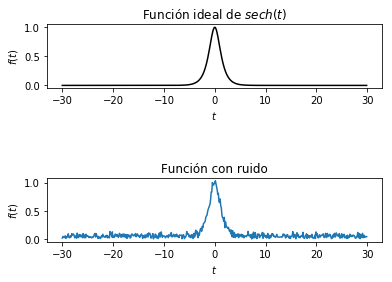

In [5]:
noise=1 #magnitud del ruido
utwonoise=fft(u3) #transformada de la función ideal
utn=utwonoise+noise*(randn(n2)+(1j*randn(n2))) #adición del ruido en parte real e imaginaria utilizando valores pseudoaleatotios
u3n=ifft(utn) #inversa de función con ruido incluido
figure(1)
subplot(311)
title('Función ideal de $sech(t)$')
xlabel('$t$')
ylabel('$f(t)$')
plot(t,u3,'k')
subplot(313)
plot(t,abs(u3n))
title('Función con ruido')
xlabel('$t$')
ylabel('$f(t)$')
show()

Aunque, en este caso, la señal real se sigue observando claramente, si se magnifica 10 veces el efecto del ruido, esta ya no se logra observar, como se muestra a continuación:

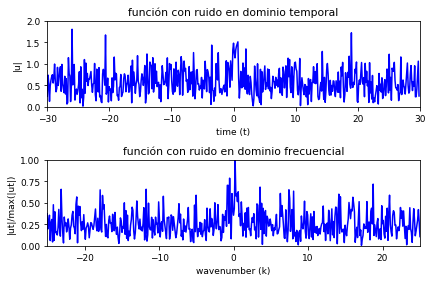

In [15]:
noise2=10
utwonoise2=fft(u3) #transformada de la función ideal
utn2=utwonoise2+noise2*(randn(n2)+(1j*randn(n2))) #adición del ruido en parte real e imaginaria utilizando valores pseudoaleatotios
u3n2=ifft(utn2) #inversa de función con ruido incluido

subplot(211)
plot(t,abs(u3n2),'b')
axis([-30, 30, 0, 2])
xlabel('time (t)')
title('función con ruido en dominio temporal')
ylabel('|u|')
subplot(212)
plot(fftshift(k2),abs(fftshift(utn2))/max(abs(fftshift(utn2))),'b')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
title('función con ruido en dominio frecuencial')
axis([-25, 25, 0, 1])
tight_layout()
show()

La gráfica superior muestra el comportamiento de la señal en el dominio del tiempo mientras que, en la inferior, se presenta en el dominio frecuencial. Como se observa, aumentando 10 veces la magnitud del ruido impide que se tenga alguna idea de la forma de la señal real, por lo cual se vuelve necesario el uso de la filtración. Uno de los filtros más sencillos que se tienen es el de Fourier, dado por la siguiente ecuación:

$\mathcal{F}(k)=exp(-\tau(k-k_0)^2)$

En este caso, $\tau$ representa el ancho de banda del filtro y $k$ el número de onda. Este funciona como un pasa bajas ya que elemina las altas frecuencias en comparación a $k_0$ y $\tau=0.2$. En este caso, se toma $k_0=0$. A continuación, se muestra este proceso:

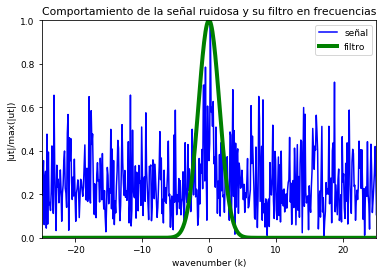

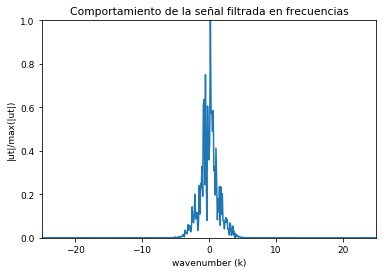

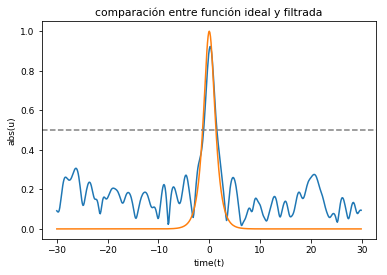

In [16]:
f=exp(-0.2*(k2)**2) #definición del filtro
unft=f*utn2 #aplicación del filtro en frecuencial
unf=ifft(unft) #transformada inversa con filtro aplicado

#graficacion de filtro y señal ruidosa
plot(fftshift(k2),abs(fftshift(utn2))/max(abs(fftshift(utn2))),'b',label='señal')
plot(fftshift(k2),fftshift(f),'g',label='filtro',lw=4)
axis([-25, 25, 0, 1])
legend(loc='best')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
title('Comportamiento de la señal ruidosa y su filtro en frecuencias')
show()

#graficacion de señal filtrada en frecuencias
plot(fftshift(k2),abs(fftshift(unft))/max(abs(fftshift(unft))))
axis([-25,25,0,1])
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
title('Comportamiento de la señal filtrada en frecuencias')
show()

#comparación entre función ideal y filtrada en dominio temporal
plot(t,abs(unf))
plot(t,u3)
xlabel('time(t)')
ylabel('abs(u)')
axhline(y=0.5,color='grey',linestyle='--')
title('comparación entre función ideal y filtrada')
show()

La primera gráfica muestra el comportamiento de la señal con ruido y la forma del filtro que se le aplica, utilizando un parámetro de ancho de banda de 0.2. Como se observa en los extremos,las frecuencias altas, con respecto a la gráfica verde, no son tenidas en cuenta y se eliminan. Al llegar al centro del filtro, definido por $k_0$, se toman todas las frecuencias por debajo del límite dado por el filtro. 

La segunda gráfica muestra el resultado de lo mencionado en el párrafo anterior. Se eliminan las frecuencias en los extremos, mientras que se mantienen las centrales.

De la última gráfica se observa el resultado final en el dominio temporal. Se concluye que sí se tiene la posibilidad de reproducir, aproximadamente, la señal original.

Ahora, si se centra la frecuencia $k_0$ 15:

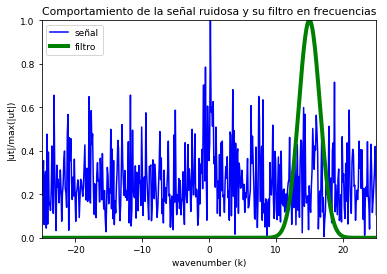

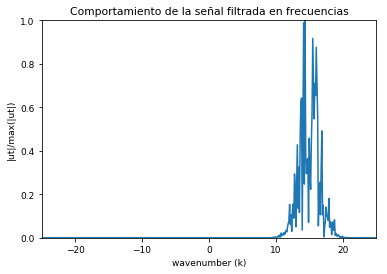

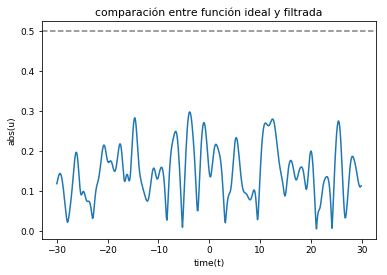

In [17]:
f2=exp(-0.2*(k2-15)**2)
unft2=f2*utn2
unf2=ifft(unft2)

plot(fftshift(k2),abs(fftshift(utn2))/max(abs(fftshift(utn2))),'b',label='señal')
plot(fftshift(k2),fftshift(f2),'g',label='filtro',lw=4)
axis([-25, 25, 0, 1])
legend(loc='best')
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
title('Comportamiento de la señal ruidosa y su filtro en frecuencias')
show()
plot(fftshift(k2),abs(fftshift(unft2))/max(abs(fftshift(unft2))))
axis([-25,25,0,1])
xlabel('wavenumber (k)')
ylabel('|ut|/max(|ut|)')
title('Comportamiento de la señal filtrada en frecuencias')
show()
plot(t,abs(unf2))
xlabel('time(t)')
ylabel('abs(u)')
axhline(y=0.5,color='grey',linestyle='--')
title('comparación entre función ideal y filtrada')
show()



Para este caso, no se tiene una señal que se encuentre en esta frecuencia. Aunque se realiza remoción de ruido, de la última gráfica se observa que no se tiene un objetivo reconocible. 

## 12.3 Aplicaciones de la FFT: radares y promedios<a name="quinto"></a>

De la teoría, se tiene que, en promedio, la suma de todo el ruido blanco, para varias señales obtenidas, debe ser cero. De esto se deriva el concepto de filtrar a través de la promediación. 

A continuación, se muestra el mismo procedimiento realizado anteriormente, con la diferencia de que se tienen varias realizaciones de la señal. En este caso se realiza el procedimiento para 1, 2, 5 y 10 de ellas.

/Users/nvalencia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/nvalencia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


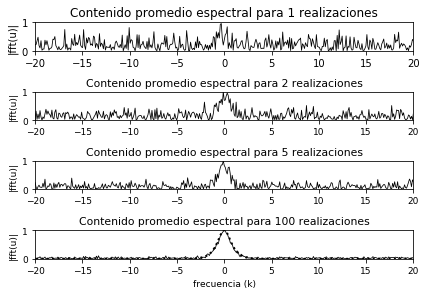

In [9]:
L3=30 #rango de tiempo a analizar
n3=512 # modos de Fourier
T3=linspace(-L3,L3,n3+1)
t3=T3[0:n3]
k3=(2*pi/(2*L3)*np.concatenate((np.arange(0,n3/2),np.arange(-n3/2,0)))) #reescalamiento al dominio 2pi
ks=fftshift(k3)
noise3=10
labels=[['(a)'],['(b)'],['(c)'],['(d)']]
realize=[1, 2, 5, 100]

#Se realiza el mismo procedimiento que se llevó a cabo en 12.2, pero para cada una de las señales obtenidas
for jj in range(size(realize)):
    u3=1/cosh(t3)
    utn3=zeros((realize[jj],n3))
    ave=zeros(n3) 
    ut3=fft(u3)
    un3=zeros((realize[jj],n3))
    dat=zeros((realize[jj],n3))
    for j in range(realize[jj]):
        utn3[j]=ut3+noise3*(randn(n3)+1j*randn(n3))
        ave=ave+utn3[j]
        dat[j]=abs(fftshift(utn3[j]))/max(abs(utn3[j]))
        un3[j]=ifft(utn3[j])
    ave=abs(fftshift(ave))/realize[jj]
    subplot(4,1,jj+1)
    plot(ks,ave/max(ave),'k',lw=0.8)
    title('Contenido promedio espectral para %.0f realizaciones' %(realize[jj]))
    rc('font', size=9) 
    axis([-20, 20, 0, 1])
    ylabel('|fft(u)|')
    tight_layout()
    
plot(ks,abs(fftshift(ut3))/max(abs(ut3)),'k:',lw=2)
rc('font', size=9)
xlabel('frecuencia (k)')
show()

Como se observa en las gráficas anteriores, al aumentar el número de realizaciones, se tiene una mejor imagen del comportamiento real de la señal. Para el primer caso, no es posible diferenciar esto mientras que, para el último, la gráfica promediada tiene el mismo comportamiento que la función ideal, la cual se observa en linea punteada.

A continuación, se muestran las primeras 8 señales usadas para obtener el promedio con 100 realizaciones.

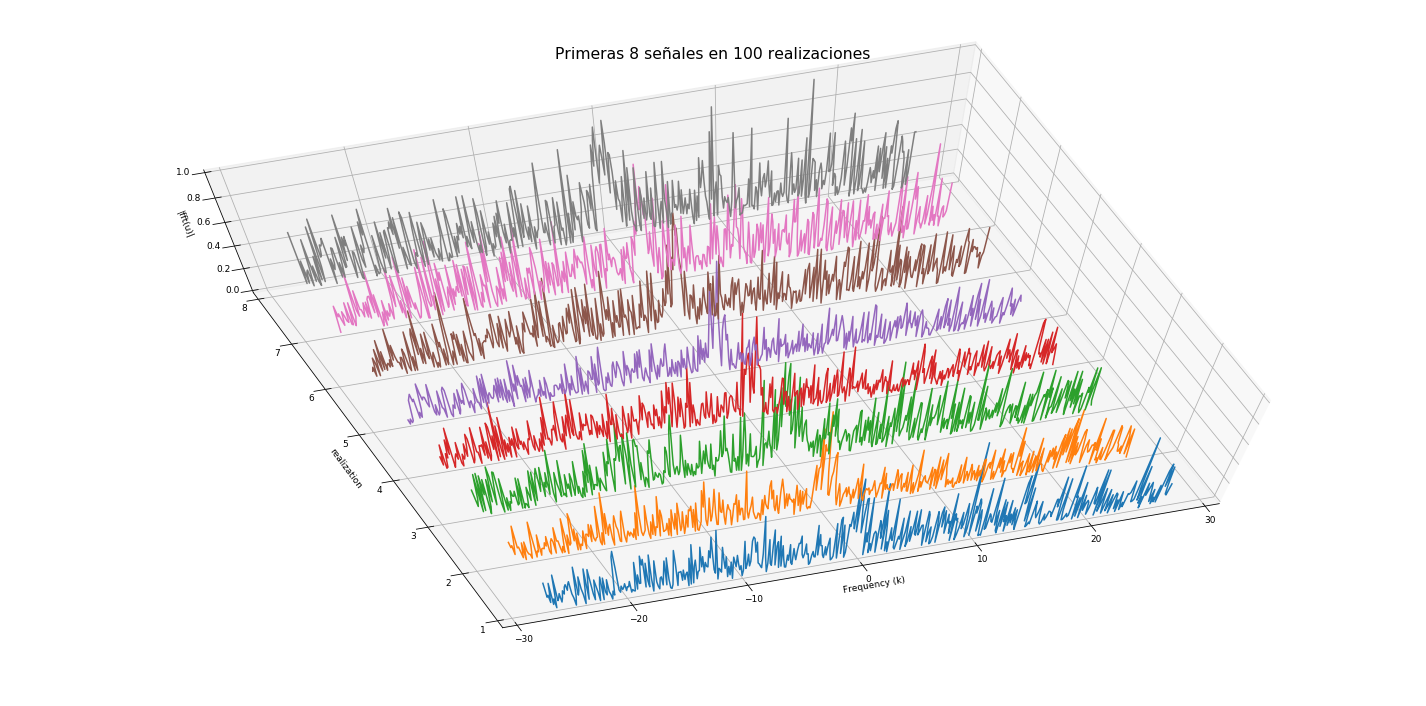

In [18]:
figure(figsize=(20,10))
ax =axes(projection='3d')
ax.set_xlabel('Frequency (k)')
ax.set_ylabel('realization')
ax.set_zlabel('|fft(u)|')
ax.set_xlim(-30,30)
ax.set_ylim(1,8)
ax.set_zlim(0,1)
ax.view_init(73,250)
for j in arange(0,8):
    plot(ks,zeros(n3)+j+1,dat[j,:])
rcParams['font.size'] = 13
tight_layout()
title('Primeras 8 señales en 100 realizaciones')
show()

Una desventaja del procedimiento recién realizado es que se pierde la dinámica del dominio temporal. Es decir, se podría tomar el resultado de la gráfica de 100 realizaciones, de la cual ya se tiene una señal limpia, y anti transformarla para obtener el resultado en el dominio temporal. Sin embargo, esto exlcluiría la manera como la señal evolucionó en el tiempo. Para observar esto, se grafican 21 realizaciones de señales que varían en el tiempo, así como sus respectivos espectros en el dominio frecuencial.

/Users/nvalencia/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


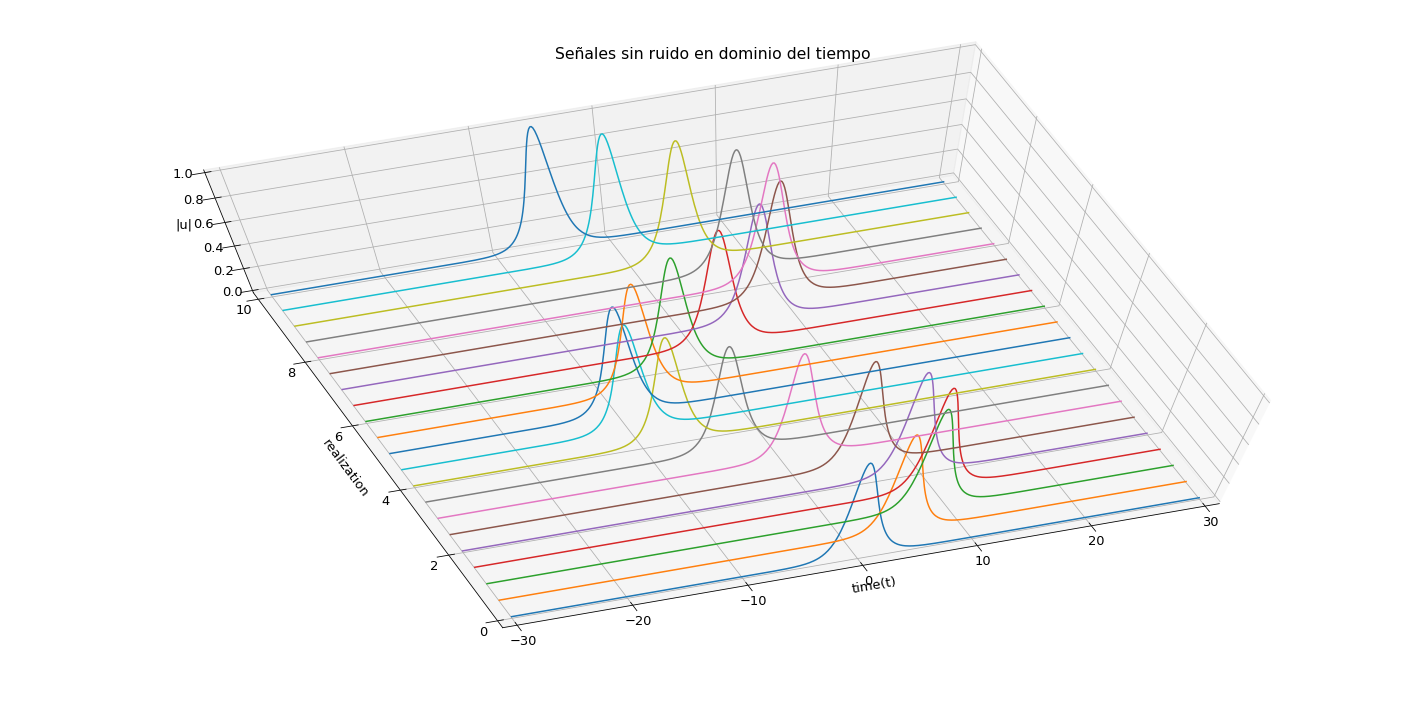

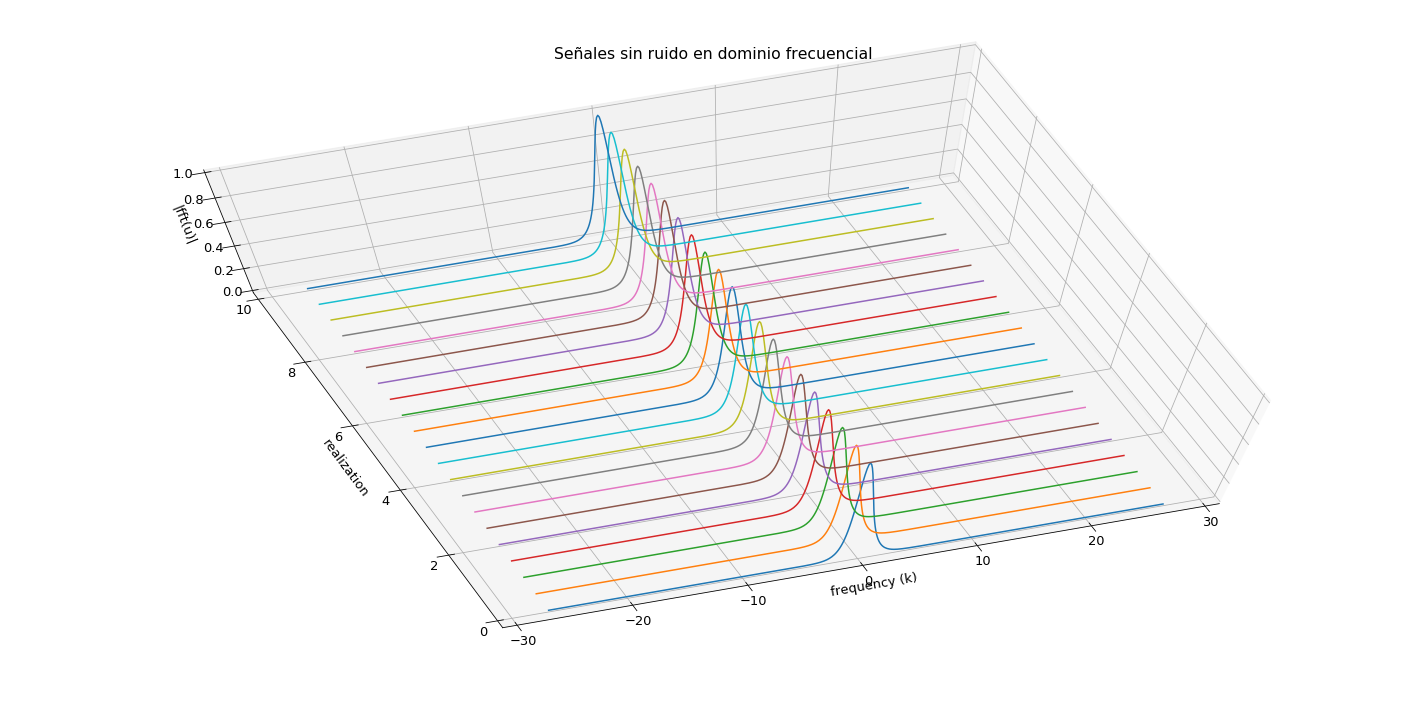

In [11]:
slc=arange(0,10.5,0.5)
[T,S]=meshgrid(t3,slc)
[K,S]=meshgrid(k3,slc)

U=1/cosh(T-10*sin(S))*exp(1j*0*T)

figure(figsize=(20,10))
ax =axes(projection='3d')
ax.set_xlabel('time(t)')
ax.set_ylabel('realization')
ax.set_zlabel('|u|')
ax.set_xlim(-30,30)
ax.set_ylim(0,10)
ax.set_zlim(0,1)
ax.view_init(73,250)
for j in range(size(slc)):
    plot(T[j,:],zeros(n3)+S[j,:],U[j,:])
rcParams['font.size'] = 13
tight_layout()
title('Señales sin ruido en dominio del tiempo')
show()

Ut=[]
Kp=[]
Utp=[]
Utn=[]
Utnp=[]
Un=[]

for j in range(size(slc)):
    Uta=fft(U[j])
    Ut.append(Uta)
    Kpa=fftshift(K[j])
    Kp.append(Kpa)
    Utpa=fftshift(Ut[j])
    Utp.append(Utpa)
    Utna=Ut[j]+noise3*(randn(n3)+1j*randn(n3))
    Utn.append(Utna)  
    Utnpa=fftshift(Utn[j])/max(abs(Utn[j]))
    Utnp.append(Utnpa)
    Una=ifft(Utn[j])
    Un.append(Una)

figure(figsize=(20,10))
ax =axes(projection='3d')
ax.set_xlabel('frequency (k)')
ax.set_ylabel('realization')
ax.set_zlabel('|fft(u)|')
ax.set_xlim(-30,30)
ax.set_ylim(0,10)
ax.set_zlim(0,1)
ax.view_init(73,250)
for j in range(size(slc)):
    plot(Kp[j],zeros(n3)+S[j],abs(Utp[j])/max(abs(Utp[0])))
rcParams['font.size'] = 13
tight_layout()
title('Señales sin ruido en dominio frecuencial')
show()


Como se observa en las gráficas anteriores, aunque la señal varía dinámicamente en el tiempo, al pasar las mismas al dominio frecuencial, los resultados no cambian. De esto se tiene que, promediando en frecuenias, se llega a un resultado siempre localizado de la misma manera mientras que, si lo anterior se lleva a cabo en el dominio temporal, sólo se borra el pulso que evoluciona en este dominio.

Ahora, se agrega ruido a las dos gráficas recién mostradas, con la misma intensidad que se ha venido utilizando

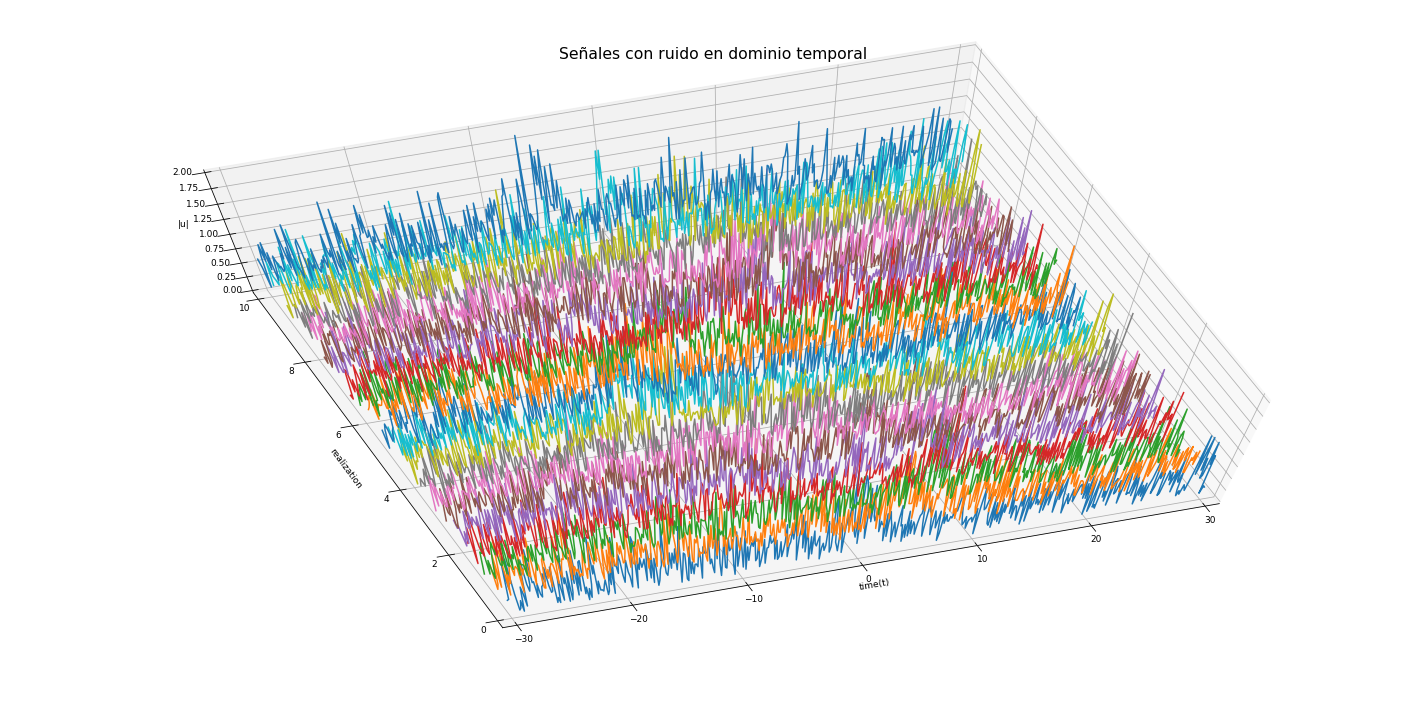

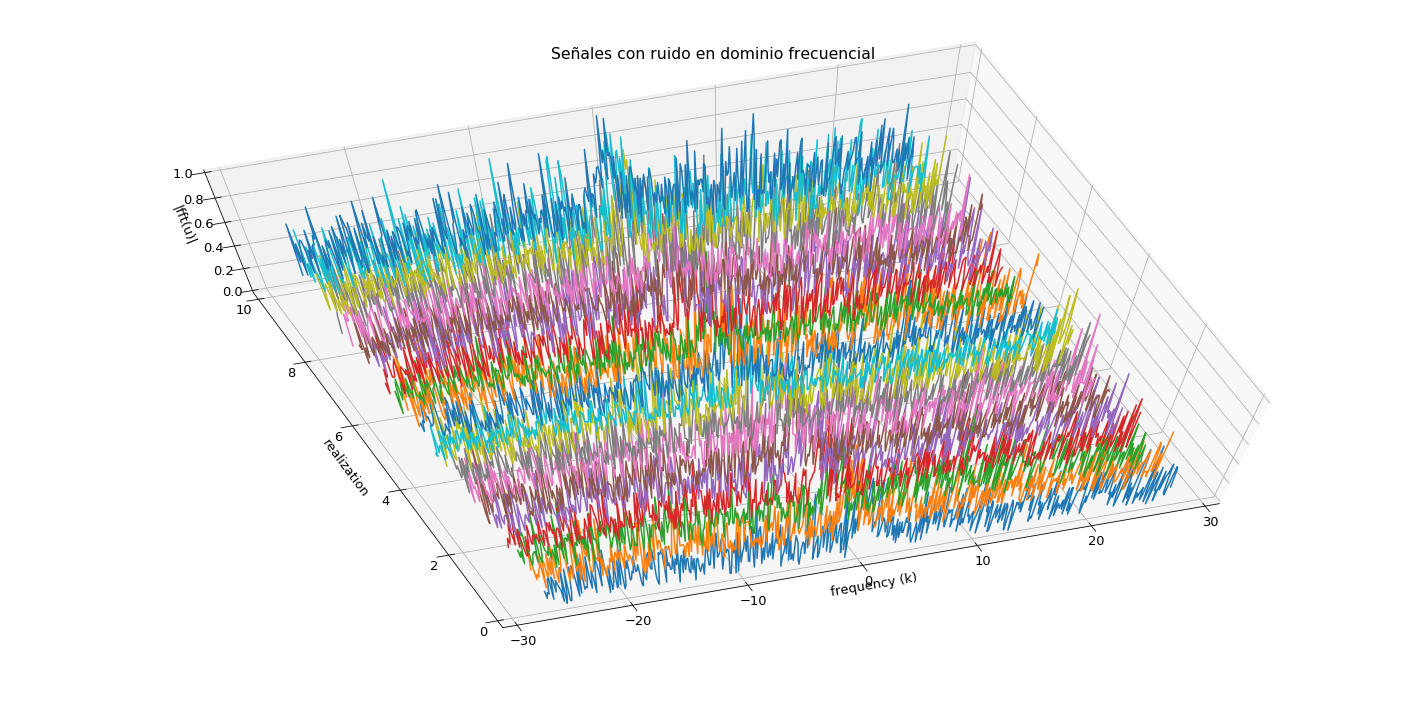

In [23]:
figure(figsize=(20,10))
ax =axes(projection='3d')
ax.set_xlabel('time(t)')
ax.set_ylabel('realization')
ax.set_zlabel('|u|')
ax.set_xlim(-30,30)
ax.set_ylim(0,10)
ax.set_zlim(0,2)
ax.view_init(73,250)
for j in range(size(slc)):
    plot(T[j],zeros(n3)+S[j],abs(Un[j]))
rcParams['font.size'] = 13
tight_layout()
title('Señales con ruido en dominio temporal')
show()

figure(figsize=(20,10))
ax =axes(projection='3d')
ax.set_xlabel('frequency (k)')
ax.set_ylabel('realization')
ax.set_zlabel('|fft(u)|')
ax.set_xlim(-30,30)
ax.set_ylim(0,10)
ax.set_zlim(0,1)
ax.view_init(73,250)
for j in range(size(slc)):
    plot(Kp[j],zeros(n3)+S[j],abs(Utnp[j]))
rcParams['font.size'] = 13
tight_layout()
title('Señales con ruido en dominio frecuencial')
show()



De lo anterior surge la necesidad de determinar si, en realidad, es posible obtener alguna clara señal de toda la información que llega y de qué manera se puede realizar esto. A continuación, se promedian las 21 realizaciones para cada uno de los dominios.

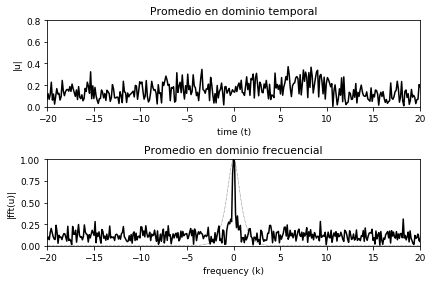

In [22]:
Uave=zeros(n3)
Utave=zeros(n3) 
for j in range(size(slc)):
    Uave=Uave+Un[j]
    Utave=Utave+Utn[j]
Uave=Uave/size(slc)
Utave=fftshift(Utave)/size(slc)

subplot(2,1,1)
axis([-20, 20, 0, 0.8])
plot(t3,abs(Uave),'k')
rc('font', size=9)
xlabel('time (t)')
ylabel('|u|')
title('Promedio en dominio temporal')
subplot(2,1,2)
plot(ks,abs(Utave)/max(abs(Utave)),'k')
plot(ks,abs(fftshift(Ut[0]))/max(abs(Ut[0])),'k:',lw=0.5)
title('Promedio en dominio frecuencial')
axis([-20, 20, 0, 1])
rc('font', size=9)
xlabel('frequency (k)')
ylabel('|fft(u)|')
tight_layout()
show()

De lo anterior se observa que, al realizar el promedio en el dominio temporal, no se obtiene un resultado apreciable, es decir, no se llega a diferenciar alguna señal. Por el contrario, si se promedia en el dominio frecuencial, se llega a una señal limpia sobre la frecuencia central de interés. Entre mayor cantidad de señales, mejor será la señal obtenida al realizar el promedio.

## Ejemplo propio<a name="sexto"></a>

Para mostrar los efectos del filtrado, se toma un acorde de Do tocado en una guitarra.

/Users/nvalencia/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  after removing the cwd from sys.path.


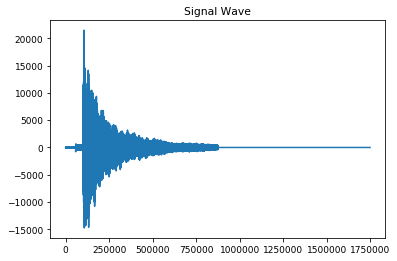

In [14]:
spf = wave.open('chord.wav','r') #lectura del archivo
#Extracción del audio
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')
figure(1)
title('Signal Wave')
plot(signal)
show()